Model Zoo
https://modelzoo.co/

https://github.com/cunhafh/UFC_bout_prediction/blob/master/.ipynb_checkpoints/UFC_bout_prediction-checkpoint.ipynb

https://github.com/WarrierRajeev/UFC-Predictions/blob/master/notebooks/preprocessing_and_EDA-1.ipynb

https://www.kaggle.com/datasets/rajeevw/ufcdata

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.shape

(6012, 144)

In [2]:
#Display value counts of data set
data.dtypes.value_counts()

float64    106
int64       28
object       9
bool         1
dtype: int64

##### Columns that not related to player (R or B)

> `Referee` : The judge of this match. Gonna focusing on players so consider to drop it.
> `date` : The data of match. Not important as there are many match per day. Drop in preprocessing
> `location`: The location of match. Not important as the stage design is consistent. Drop in preprocessing
> `Winner` : Winner of game, TARGET for ML
> `title_bout`: Is title bout or not (Final) 0 or 1 93% is 0 and only 7% is 1 may drop in preprocessing 
> `weight_class`: Weight Class -> `['Bantamweight', 'Middleweight', 'Heavyweight', 'WomenStrawweight','WomenBantamweight', 'Lightweight', 'Welterweight', 'Flyweight','LightHeavyweight', 'Featherweight', 'WomenFlyweight','WomenFeatherweight', 'CatchWeight', 'OpenWeight']`

In [3]:
# features that not belongs to player
filter_col = [col for col in data if (not col.startswith('R_') and not col.startswith('B_')) ]
print(filter_col)

['Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class']


In [4]:
# features that belongs to RED (R) player
filter_col = [col for col in data if col.startswith('R_')]
print(filter_col)

['R_fighter', 'R_avg_KD', 'R_avg_opp_KD', 'R_avg_SIG_STR_pct', 'R_avg_opp_SIG_STR_pct', 'R_avg_TD_pct', 'R_avg_opp_TD_pct', 'R_avg_SUB_ATT', 'R_avg_opp_SUB_ATT', 'R_avg_REV', 'R_avg_opp_REV', 'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed', 'R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_att', 'R_avg_opp_TOTAL_STR_landed', 'R_avg_TD_att', 'R_avg_TD_landed', 'R_avg_opp_TD_att', 'R_avg_opp_TD_landed', 'R_avg_HEAD_att', 'R_avg_HEAD_landed', 'R_avg_opp_HEAD_att', 'R_avg_opp_HEAD_landed', 'R_avg_BODY_att', 'R_avg_BODY_landed', 'R_avg_opp_BODY_att', 'R_avg_opp_BODY_landed', 'R_avg_LEG_att', 'R_avg_LEG_landed', 'R_avg_opp_LEG_att', 'R_avg_opp_LEG_landed', 'R_avg_DISTANCE_att', 'R_avg_DISTANCE_landed', 'R_avg_opp_DISTANCE_att', 'R_avg_opp_DISTANCE_landed', 'R_avg_CLINCH_att', 'R_avg_CLINCH_landed', 'R_avg_opp_CLINCH_att', 'R_avg_opp_CLINCH_landed', 'R_avg_GROUND_att', 'R_avg_GROUND_landed', 'R_avg_opp_GROUND_att', 'R_avg_op

In [5]:
# features that belongs to RED (B) player
filter_col = [col for col in data if col.startswith('B_')]
print(filter_col)

['B_fighter', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_opp_GROUND_att', 'B_avg_op

In [6]:
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [7]:
data['Winner'].isnull().sum()

0

In [8]:
data.isnull().sum()

R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64

In [9]:
# columns with highest null value
print(str(data.B_avg_KD.isnull().sum()/len(data)*100)+"%")
data.isnull().sum().idxmax()

23.73586161011311%


'B_avg_KD'

In [11]:
# columns with null value in it
print(data.columns[data.isna().any()].tolist())

['Referee', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_opp_GROUND_att', 'B_avg_opp_

In [12]:
data['Winner'].replace({'Red':1,'Blue':0},inplace =True)

In [13]:
target_columns = []
feature_columns = []
data1 = []

target_columns = ['Winner']
feature_columns = ['B_total_rounds_fought','B_total_title_bouts','B_current_win_streak','B_current_lose_streak','B_longest_win_streak','B_wins','B_losses','B_draw','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_KO/TKO','B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage',
           'R_total_rounds_fought','R_total_title_bouts','R_current_win_streak','R_current_lose_streak','R_longest_win_streak','R_wins','R_losses','R_draw','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage']
UFC_data = ['B_total_rounds_fought','B_total_title_bouts','B_current_win_streak','B_current_lose_streak','B_longest_win_streak','B_wins','B_losses','B_draw','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_KO/TKO','B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage',
           'R_total_rounds_fought','R_total_title_bouts','R_current_win_streak','R_current_lose_streak','R_longest_win_streak','R_wins','R_losses','R_draw','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage','Winner']

targets = data[target_columns]
features = data[feature_columns]
data1 = data[UFC_data]

display(features.head(), targets.head())

,B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,...,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage
0,4,0,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,4,0,2,0,2,2,0,0,0,1,...,2,4,2,0,0,1,0,3,0,0
2,0,0,0,0,0,0,0,0,0,0,...,3,4,3,0,0,0,1,3,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,1,3,0,3,4,1,0,0,0,...,2,5,6,0,0,0,1,2,2,0


,Winner
0,1
1,1
2,1
3,0
4,0


## Data Understanding

<AxesSubplot:xlabel='Winner', ylabel='count'>

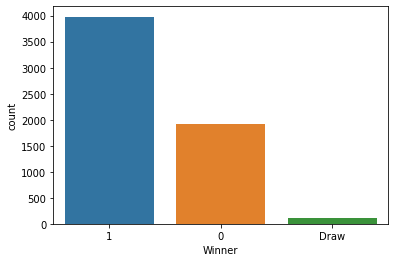

In [17]:
import seaborn as sns

sns.countplot(x=data['Winner'])
#1=red 0=blue
# drop draw records

In [44]:
draw = data[(data.Winner == 'Draw')].index
data = data.drop(draw)

<AxesSubplot:xlabel='Winner', ylabel='count'>

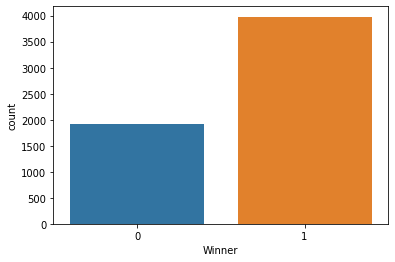

In [45]:
sns.countplot(x=data['Winner'])

In [52]:
from sklearn.model_selection import train_test_split

y_col = 'Winner'

feature_cols = [x for x in data.columns if x not in 'y_col']
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Project Idea 1: Outlier detection on the players; find out who are the
outstanding players. 

In [53]:
# Number of rows
print(data.shape)

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

(5902, 144)
['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att', 'B_avg_

In [54]:
data.describe()

,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5902.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,...,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5898.000000,5505.000000,5900.000000,5732.000000,5840.000000
mean,0.674178,0.248868,0.177107,0.453651,0.434425,0.292703,0.269270,0.479106,0.409379,0.157592,...,0.307184,1.253304,1.296340,0.796340,0.069807,179.000665,183.578096,170.695763,29.296581,29.583733
std,0.468721,0.379931,0.325521,0.130819,0.132921,0.273646,0.267102,0.724054,0.653898,0.343495,...,0.620783,1.684197,1.850574,1.355551,0.275301,8.822666,10.588959,35.720741,4.068421,4.168465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.000000,0.377324,0.350706,0.031250,0.033691,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,1.000000,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.149902,0.118317,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,1.000000,0.500000,0.250000,0.528750,0.509790,0.500000,0.423659,0.750000,0.531250,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [55]:
data.isnull().sum()

R_fighter         0
B_fighter         0
Referee          31
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     397
R_Weight_lbs      2
B_age           170
R_age            62
Length: 144, dtype: int64

## Preprocessing

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def preprocessing(data):
    # replace target column into 
    data['Winner'].replace({'Red':0,'Blue':1},inplace =True)
    
    # drop unnecessary columns
    data = data.drop(['Referee', 'date', 'location', 'title_bout'], axis=1)
    
    # transfer the column into numeric value
    data['R_fighter'] = le.fit_transform(data['R_fighter'])
    data['B_fighter'] = le.fit_transform(data['B_fighter'])
    data['weight_class'] = le.fit_transform(data['weight_class'])
    data['R_Stance'] = le.fit_transform(data['R_Stance'])
    data['B_Stance'] = le.fit_transform(data['B_Stance'])

    # seperate data into 2 set
    df = data.fillna(data.mean())
    df1 = data.fillna('0')

    return df,df1

## DF - fillna with mean

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


def fillnaMethods():
    y_col = 'Winner'
    feature_cols = [x for x in df.columns if x not in 'y_col']
    X_data = df[feature_cols]
    y_data = df[y_col]

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    classifier_tree = KNeighborsClassifier()

    y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
    

    print(classification_report(y_test, y_predict))

In [66]:
from sklearn.model_selection import train_test_split

y_col = 'Winner'

feature_cols = [x for x in df.columns if x not in 'y_col']
X_data = df[feature_cols]
y_data = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

classifier_tree = KNeighborsClassifier()

y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

/home/pc/g5_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.39      0.24      0.30       389
           1       0.69      0.82      0.75       792

    accuracy                           0.63      1181
   macro avg       0.54      0.53      0.52      1181
weighted avg       0.59      0.63      0.60      1181



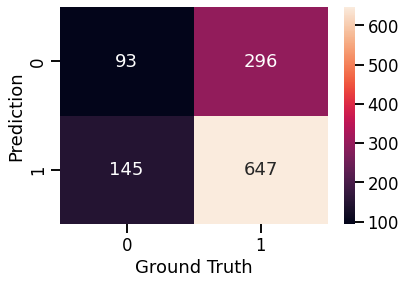

In [69]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test,y_predict)

sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth');

x_axis_labels = ['white','red'] # labels for x-axisy_axis_labels = ['white','red'] # labels for y-axissns.heatmap(cm, linewidths=1, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, ax=ax, fmt='g')

## DF1 - fillna with 0

In [70]:
from sklearn.model_selection import train_test_split

y_col = 'Winner'

# Split the data that is not one-hot encoded
feature_cols = [x for x in df1.columns if x not in 'y_col']
X_data = df1[feature_cols]
y_data = df1[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


In [71]:
from sklearn.neighbors import KNeighborsClassifier

classifier_tree = KNeighborsClassifier()

y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

/home/pc/g5_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [72]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.38      0.28      0.32       389
           1       0.69      0.77      0.73       792

    accuracy                           0.61      1181
   macro avg       0.53      0.53      0.52      1181
weighted avg       0.59      0.61      0.59      1181



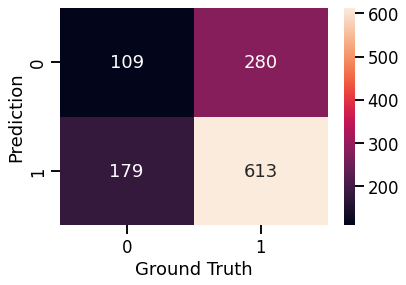

In [73]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test,y_predict)

sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth');

x_axis_labels = ['white','red'] # labels for x-axisy_axis_labels = ['white','red'] # labels for y-axissns.heatmap(cm, linewidths=1, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, ax=ax, fmt='g')

In [74]:
df1.isnull().sum()

R_fighter       0
B_fighter       0
Winner          0
weight_class    0
B_avg_KD        0
               ..
R_Height_cms    0
R_Reach_cms     0
R_Weight_lbs    0
B_age           0
R_age           0
Length: 140, dtype: int64

#### Save better scorings fill empty dataset: Fill with Mean

In [75]:
df.to_csv('processeddata.csv', encoding='utf-8')

### Dirty Model

most suitable model (determine by highest scorings) , from supervised to unsupervised

In [76]:
import pandas as pd
import numpy as np
data = pd.read_csv('processeddata.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.shape

(5902, 140)

In [77]:
data.head()

,R_fighter,B_fighter,Winner,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,11,686,1,0,0.000000,0.000000,0.420000,0.495000,0.330000,0.36000,...,0,1,0,0,1,170.18,177.80,135.0,31.0,27.0
1,1412,1606,1,7,0.500000,0.000000,0.660000,0.305000,0.300000,0.50000,...,0,3,0,0,1,182.88,187.96,185.0,32.0,28.0
2,1351,695,1,4,0.248868,0.177107,0.453651,0.434425,0.292703,0.26927,...,1,3,0,0,3,187.96,190.50,264.0,32.0,28.0
3,234,1372,0,13,0.248868,0.177107,0.453651,0.434425,0.292703,0.26927,...,0,0,0,0,4,160.02,160.02,115.0,28.0,25.0
4,942,1190,0,10,0.125000,0.000000,0.535625,0.578750,0.185000,0.16625,...,1,2,2,0,1,167.64,172.72,135.0,29.0,43.0


In [78]:
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x not in 'Winner']
X_data = data[feature_cols]
y_data = data['Winner']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

In [79]:
print("Train Dataset Size: " , X_train.shape, y_train.shape)
print("Train Dataset Size: " , X_test.shape, y_test.shape)

Train Dataset Size:  (4131, 139) (4131,)
Train Dataset Size:  (1771, 139) (1771,)


In [80]:
# 4 supervised models that focus on outliers detection
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# metrics to measure scorings of models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

def modelling(X_train, X_test, y_train, y_test):

    #IsolationForest
    iso = IsolationForest(contamination=0.1,n_jobs=5)
    predict_iso = iso.fit_predict(X_test)
    isoacc = accuracy_score(predict_iso,y_test)
    isopre = precision_score(predict_iso,y_test,average='weighted')
    isorec = recall_score(predict_iso,y_test,average='weighted')
    isof1  = f1_score(predict_iso,y_test,average='weighted')

    #EllipticEnvelope (Minimum Covariance Determinant)
    ee = EllipticEnvelope(contamination=0.01)
    predict_ee = ee.fit_predict(X_test)
    eeacc = accuracy_score(predict_ee,y_test)
    eepre = precision_score(predict_ee,y_test,average='weighted')
    eerec = recall_score(predict_ee,y_test,average='weighted')
    eef1  = f1_score(predict_ee,y_test,average='weighted')

    #LocalOutlierFactor
    lof = LocalOutlierFactor(n_jobs=5)
    predict_lof = lof.fit_predict(X_test)
    lofacc = accuracy_score(predict_lof,y_test)
    lofpre = precision_score(predict_lof,y_test,average='weighted')
    lofrec = recall_score(predict_lof,y_test,average='weighted')
    loff1  = f1_score(predict_lof,y_test,average='weighted')

    #OneClassSVM
    ocsvm = OneClassSVM(nu=0.01)
    predict_ocsvm = ocsvm.fit_predict(X_test)
    ocsvmacc = accuracy_score(predict_ocsvm,y_test)
    ocsvmpre = precision_score(predict_ocsvm,y_test,average='weighted')
    ocsvmrec = recall_score(predict_ocsvm,y_test,average='weighted')
    ocsvmf1  = f1_score(predict_ocsvm,y_test,average='weighted')

    #cross-val score
    scores_iso = cross_val_score(iso, X_test, y_test, cv=5,scoring="accuracy")
    scores_ee = cross_val_score(ee, X_test, y_test, cv=5,scoring="accuracy")
    scores_lof = cross_val_score(lof, X_test, y_test, cv=5,scoring="accuracy")
    scores_ocsvm = cross_val_score(ocsvm, X_test, y_test, cv=5,scoring="accuracy")

    return [["IsolationForest",isoacc,isopre,isorec,isof1,scores_iso.mean(),scores_iso.std()]
            ,["EllipticEnvelope",eeacc,eepre,eerec,eef1,scores_ee.mean(),scores_ee.std()]
            ,["LocalOutlierFactor",lofacc,lofpre,lofrec,loff1,scores_lof.mean(),scores_lof.std()]
            ,["OneClassSVM",ocsvmacc,ocsvmpre,ocsvmrec,ocsvmf1,scores_ocsvm.mean(),scores_ocsvm.std()]]

result = modelling(X_train, X_test, y_train, y_test)

/home/pc/g5_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/home/pc/g5_env/lib/python3.9/site

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

def kmeans(X_train, X_test, y_train, y_test):

    km = KMeans(n_clusters=2, random_state=42)
    km = km.fit(X_data)
    y_pred = km.predict(X_test)
    kmacc = accuracy_score(y_pred,y_test)
    kmpre = precision_score(y_pred,y_test,average='weighted')
    kmrec = recall_score(y_pred,y_test,average='weighted')
    kmf1  = f1_score(y_pred,y_test,average='weighted')

    scores_km = cross_val_score(km, X_data, y_data, cv=5,scoring="accuracy")

    return ['K-Means',kmacc,kmpre,kmrec,kmf1,scores_km.mean(),scores_km.std()]

result_km = kmeans(X_train, X_test, y_train, y_test)

In [83]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import keras
import numpy as np

from sklearn.preprocessing import StandardScaler

def create_nn():
    model2 = Sequential()
    model2.add(Dense(8, activation='relu', input_shape=(139,)))
    model2.add(Dense(8, activation='relu'))
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])
    return model2

def neural_network(X_train, X_test, y_train, y_test):
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(139,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
    optimizer='sgd',
    metrics=[keras.metrics.SparseCategoricalAccuracy(),keras.metrics.Precision(),keras.metrics.Recall()])
        
    #convert keras model to sklearn
    keras_to_sklearn = KerasClassifier(build_fn=lambda: create_nn(), epochs=8, batch_size=1, verbose=1)
    # back to neural network, fit the train data
    model.fit(X_train, y_train,epochs=8, batch_size=1, verbose=1)
    y_pred = model.predict(X_test)
    score = model.evaluate(X_test, y_test,verbose=1)

    # get the cross-val scores of this model
    kfold = KFold(n_splits=5)
    scores_nn = cross_val_score(keras_to_sklearn, X_test, y_test, cv=kfold,scoring="accuracy")

    return ['Neural Network', score[1],score[2],score[3],scores_nn.mean(),scores_nn.std()]
result_nn = neural_network(X_train, X_test, y_train, y_test)

Epoch 1/8


/tmp/ipykernel_15320/1866600349.py:37: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_to_sklearn = KerasClassifier(build_fn=lambda: create_nn(), epochs=8, batch_size=1, verbose=1)


4131/4131 [==============================] - 3s 678us/step - loss: 0.6103 - sparse_categorical_accuracy: 0.3263 - precision: 0.6828 - recall: 0.9414
Epoch 2/8
4131/4131 [==============================] - 3s 669us/step - loss: 0.5796 - sparse_categorical_accuracy: 0.3263 - precision: 0.7006 - recall: 0.9382
Epoch 3/8
4131/4131 [==============================] - 3s 671us/step - loss: 0.5694 - sparse_categorical_accuracy: 0.3263 - precision: 0.7089 - recall: 0.9134
Epoch 4/8
4131/4131 [==============================] - 3s 667us/step - loss: 0.5610 - sparse_categorical_accuracy: 0.3263 - precision: 0.7219 - recall: 0.9012
Epoch 5/8
4131/4131 [==============================] - 3s 669us/step - loss: 0.5539 - sparse_categorical_accuracy: 0.3263 - precision: 0.7258 - recall: 0.8962
Epoch 6/8
4131/4131 [==============================] - 3s 668us/step - loss: 0.5477 - sparse_categorical_accuracy: 0.3263 - precision: 0.7317 - recall: 0.8926
Epoch 7/8
4131/4131 [==============================] - 3

In [84]:
result.append(result_km)
result.append(result_nn)

In [85]:
# load result table csv here next time
result_table = pd.DataFrame(result, columns = ['Model Name','Average Accuracy', 'Weighted Precision','Weighted Recall','Weighted F1-score','Cross-Val Mean','Cross-Val SD'])
result_table.round(4).to_csv("dirty_result.csv",header=True)
result_table.round(4)

,Model Name,Average Accuracy,Weighted Precision,Weighted Recall,Weighted F1-score,Cross-Val Mean,Cross-Val SD
0,IsolationForest,0.6098,0.8128,0.6098,0.6968,0.6104,0.0254
1,EllipticEnvelope,0.6669,0.9774,0.6669,0.7928,0.6669,0.0175
2,LocalOutlierFactor,0.6674,0.9777,0.6674,0.7933,NaN,NaN
3,OneClassSVM,0.6669,0.9763,0.6669,0.7924,0.6640,0.0188
4,K-Means,0.5144,0.5145,0.5144,0.4990,0.5117,0.0068
5,Neural Network,0.3247,0.7240,0.8336,0.6708,0.0262,NaN


In [87]:
result_table[['Model Name','Average Accuracy']].sort_values('Average Accuracy',ascending=False).round(4)

,Model Name,Average Accuracy
2,LocalOutlierFactor,0.6674
1,EllipticEnvelope,0.6669
3,OneClassSVM,0.6669
0,IsolationForest,0.6098
4,K-Means,0.5144
5,Neural Network,0.3247


In [88]:
result_table[['Model Name','Cross-Val Mean','Cross-Val SD']].sort_values('Cross-Val Mean',ascending=False).round(4)

,Model Name,Cross-Val Mean,Cross-Val SD
1,EllipticEnvelope,0.6669,0.0175
3,OneClassSVM,0.6640,0.0188
0,IsolationForest,0.6104,0.0254
4,K-Means,0.5117,0.0068
5,Neural Network,0.0262,NaN
2,LocalOutlierFactor,NaN,NaN


### All done, dump into table, visualize

In [89]:
#import processed dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def getTestTrain():
    data = pd.read_csv('processeddata.csv',index_col=0)
    data = data.drop(['Unnamed: 0'], axis=1)
    feature_cols = [x for x in data.columns if x not in 'Winner']
    X_data = data[feature_cols]
    y_data = data['Winner']
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test,X_data,y_data

In [90]:
# get splited dataset
X_train, X_test, y_train, y_test,X_data,y_data = getTestTrain()

##### Hyper-parameter Tuning - Elliptic Envelope

In [91]:
# parameters would be tuning
from sklearn.model_selection import GridSearchCV
from sklearn.covariance import EllipticEnvelope

def hyperT_EE():
    param_grid = {'assume_centered':[True,False],
              'support_fraction': [0,0.1,0.3,0.5,0.7,0.9,1.0],
              'contamination': [0,0.1,0.2,0.3,0.4,0.5]}
    GR = GridSearchCV(EllipticEnvelope(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=10)
    GR.fit(X_train,y_train)
    return GR.best_estimator_


In [92]:
best_ee = hyperT_EE()

/home/pc/g5_env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:136: RuntimeWarning: Mean of empty slice.
  location = X_support.mean(0)
/home/pc/g5_env/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/pc/g5_env/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:93: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(X.T, bias=1)
/home/pc/g5_env/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/pc/g5_env/lib/p

In [100]:
print(best_ee)

EllipticEnvelope(random_state=42, support_fraction=0.3)


##### Hyper-parameter Tuning - One Class Support Vector Machine

In [94]:
from sklearn.svm import OneClassSVM

def hyperT_OCSVM():
    param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}
    
    GR = GridSearchCV(OneClassSVM(),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=10)
    GR.fit(X_train,y_train)
    return GR.best_estimator_

In [95]:
best_ocsvm = hyperT_OCSVM()

In [101]:
print(best_ocsvm)

OneClassSVM(gamma=0.0001)


##### Hyper-parameter Tuning - Isolation Forest

In [97]:
from sklearn.ensemble import IsolationForest

def hyperT_ISO():
    param_grid = {'n_estimators': list(range(1,101)),
                  'contamination': [0,0.1,0.2,0.3,0.4,0.5],
                  'max_features':[1,2,3,4,5]}
    
    GR = GridSearchCV(IsolationForest(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=10)
    GR.fit(X_train,y_train)
    return GR.best_estimator_

In [98]:
best_iso = hyperT_ISO()

/home/pc/g5_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not h

In [102]:
print(best_iso)

IsolationForest(contamination=0.1, max_features=4, n_estimators=1,
                random_state=42)


##### Implement optimize parameter to three shortlisted models

In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

def best_EE(X,y):
    ee = EllipticEnvelope(random_state=42, support_fraction=0.3)
    ee.fit_predict(X,y)
    return ee

def best_OCSVM(X,y):
    ocsvm = OneClassSVM(gamma=0.0001)
    ocsvm.fit(X,y)
    return ocsvm

def best_ISO(X,y):
    iso = IsolationForest(contamination=0.1, max_features=4, n_estimators=1, random_state=42)
    iso.fit(X,y)
    return iso

##### Detect outliers in test dataset

In [120]:
# train with overall data and detect test data

#ee
ee = best_EE(X_train,y_train)
# Predict the anomalies
prediction = ee.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction))

/home/pc/g5_env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      0.91      0.48       575
           1       0.71      0.10      0.18      1196

    accuracy                           0.37      1771
   macro avg       0.52      0.51      0.33      1771
weighted avg       0.59      0.37      0.28      1771



In [121]:
# train with overall data and detect test data

#OCSVM
ocsvm = best_OCSVM(X_train,y_train)
# Predict the anomalies
prediction = ocsvm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.22      0.01      0.02       575
           1       0.67      0.98      0.80      1196

    accuracy                           0.67      1771
   macro avg       0.45      0.50      0.41      1771
weighted avg       0.53      0.67      0.55      1771



In [122]:
# train with overall data and detect test data

#ee
iso = best_ISO(X_train,y_train)
# Predict the anomalies
prediction = iso.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.32      0.93      0.48       575
           1       0.66      0.06      0.11      1196

    accuracy                           0.35      1771
   macro avg       0.49      0.50      0.30      1771
weighted avg       0.55      0.35      0.23      1771



/home/pc/g5_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


##### Detect outliers in overall dataset (More practical)

In [123]:
# train with overall data and detect test data

#ee
ee = best_EE(X_train,y_train)
# Predict the anomalies
prediction = ee.predict(X_data)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_data, prediction))

/home/pc/g5_env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      0.91      0.48      1923
           1       0.70      0.10      0.18      3979

    accuracy                           0.37      5902
   macro avg       0.52      0.51      0.33      5902
weighted avg       0.58      0.37      0.28      5902



In [124]:
# train with overall data and detect test data

#OCSVM
ocsvm = best_OCSVM(X_train,y_train)
# Predict the anomalies
prediction = ocsvm.predict(X_data)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_data, prediction))

              precision    recall  f1-score   support

           0       0.32      0.36      0.34      1923
           1       0.67      0.64      0.66      3979

    accuracy                           0.55      5902
   macro avg       0.50      0.50      0.50      5902
weighted avg       0.56      0.55      0.55      5902



In [125]:
# train with overall data and detect test data

#iso
iso = best_ISO(X_train,y_train)
# Predict the anomalies
prediction = iso.predict(X_data)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_data, prediction))

              precision    recall  f1-score   support

           0       0.32      0.94      0.48      1923
           1       0.65      0.06      0.10      3979

    accuracy                           0.34      5902
   macro avg       0.49      0.50      0.29      5902
weighted avg       0.55      0.34      0.23      5902



/home/pc/g5_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [167]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visual_EE(X_data,y_data):
    # rescale the data
    x_scaled = MinMaxScaler().fit_transform(X_data)
    
    # reduce the data to 2 dimensions using t-SNE
    x_reduced = TSNE(n_components=2, random_state=0).fit_transform(x_scaled)
    
    # fit the model to the reduced data
    ee = best_EE(x_reduced,y_data)

    # extract the model predictions
    x_predicted = ee.predict(x_reduced)
    
    # convert -1 (outliers) to 1 and others to 0
    #x_predicted = [1 if i==-1 else 0 for i in x_predicted]
    
    # define the meshgrid
    x_min, x_max = x_reduced[:, 0].min() - 5, x_reduced[:, 0].max() + 5
    y_min, y_max = x_reduced[:, 1].min() - 5, x_reduced[:, 1].max() + 5

    x_ = np.linspace(x_min, x_max, 500)
    y_ = np.linspace(y_min, y_max, 500)

    xx, yy = np.meshgrid(x_, y_)

    # evaluate the decision function on the meshgrid
    z = ee.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # plot the decision function and the reduced data
    plt.contourf(xx, yy, z, cmap=plt.cm.PuBu)
    a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
    b = plt.scatter(x_reduced[x_predicted == 1, 0], x_reduced[x_predicted == 1, 1], c='white', edgecolors='k')
    c = plt.scatter(x_reduced[x_predicted == -1, 0], x_reduced[x_predicted == -1, 1], c='gold', edgecolors='k')
    plt.legend([a.collections[0], b, c], ['learned frontier', 'regular observations', 'abnormal observations'], bbox_to_anchor=(1.05, 1))
    plt.axis('tight')
    plt.show()


In [168]:
def visual_OCSVM(X_data,y_data):
    # rescale the data
    x_scaled = MinMaxScaler().fit_transform(X_data)
    
    # reduce the data to 2 dimensions using t-SNE
    x_reduced = TSNE(n_components=2, random_state=0).fit_transform(x_scaled)
    
    # fit the model to the reduced data
    ocsvm = best_OCSVM(x_reduced,y_data)

    # extract the model predictions
    x_predicted = ocsvm.predict(x_reduced)
    
    # convert -1 (outliers) to 1 and others to 0
    #x_predicted = [1 if i==-1 else 0 for i in x_predicted]
    
    # define the meshgrid
    x_min, x_max = x_reduced[:, 0].min() - 5, x_reduced[:, 0].max() + 5
    y_min, y_max = x_reduced[:, 1].min() - 5, x_reduced[:, 1].max() + 5

    x_ = np.linspace(x_min, x_max, 500)
    y_ = np.linspace(y_min, y_max, 500)

    xx, yy = np.meshgrid(x_, y_)

    # evaluate the decision function on the meshgrid
    z = ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # plot the decision function and the reduced data
    plt.contourf(xx, yy, z, cmap=plt.cm.PuBu)
    a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
    b = plt.scatter(x_reduced[x_predicted == 1, 0], x_reduced[x_predicted == 1, 1], c='white', edgecolors='k')
    c = plt.scatter(x_reduced[x_predicted == -1, 0], x_reduced[x_predicted == -1, 1], c='gold', edgecolors='k')
    plt.legend([a.collections[0], b, c], ['learned frontier', 'regular observations', 'abnormal observations'], bbox_to_anchor=(1.05, 1))
    plt.axis('tight')
    plt.show()

In [170]:
def visual_ISO(X_data,y_data):
    iso = best_ISO(X_data,y_data)
    pred = iso.predict(X_data)
    X_data['anomaly']=pred
    outliers=X_data.loc[X_data['anomaly']==-1]
    outlier_index=list(outliers.index)
    
    #print(outlier_index)
    #Find the number of anomalies and normal points here points classified -1 are anomalous
    #print(X_data['anomaly'].value_counts())
    
    from sklearn.decomposition import PCA
    pca = PCA(2)
    pca.fit(X_data)
    res=pd.DataFrame(pca.transform(X_data))
    Z = np.array(res)
    plt.title("IsolationForest")
    plt.contourf( Z, cmap=plt.cm.Blues_r)
    b1 = plt.scatter(res[0], res[1], c='green',
                     s=20,label="normal points")
    b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
    plt.legend(loc="upper right")
    plt.show()

In [ ]:
visual_EE(X_data,y_data)

In [ ]:
visual_OCSVM(X_data,y_data)

In [ ]:
visual_ISO(X_data,y_data)

### Listing out the outstanding matches (Deployment of Final Model)

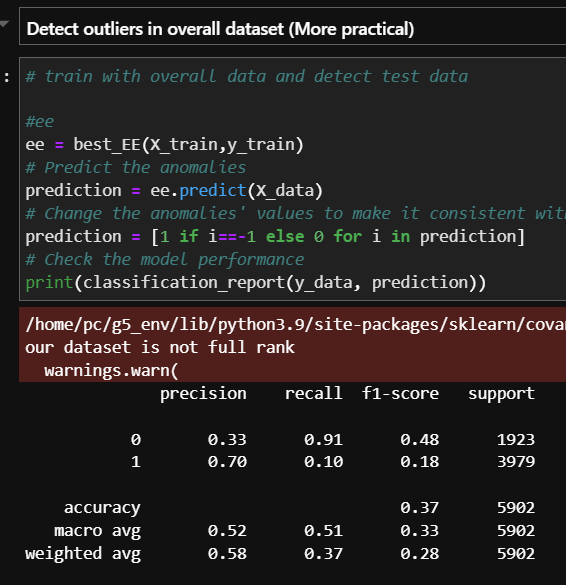

In [53]:
#import processed dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def getTestTrain():
    data = pd.read_csv('processeddata.csv',index_col=0)
    feature_cols = [x for x in data.columns if x not in 'Winner']
    X_data = data[feature_cols]
    y_data = data['Winner']
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
    return X_data,y_data,X_train, X_test, y_train, y_test

In [54]:
# in the end we choose EE for final model
## Why?
### 1. suitable range of outliers founded
### 2. Exclude OCSVM that detect large portion of outliers, EE have higher accuracy compared to ISO
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def list_players():
    X_data,y_data,X_train, X_test, y_train, y_test = getTestTrain()
    # train the EE model
    print("Fit in training dataset and detect outliers (outstanding matches) in dataset")
    ee = best_EE(X_train,y_train)
    prediction = ee.predict(X_data)
    X_data['anomaly']=prediction
    
    ##index of outstanding matches
    outliers=X_data.loc[X_data['anomaly']==-1]
    outlier_index=list(outliers.index)
    print("There are " + str(len(outlier_index)) + " outstanding matches detected")
    
    # import original dataset and extract 3 features R_Player, B_PLayer and Win
    print("Retrieving original dataset")
    df_og = pd.read_csv("data.csv")
    print("Loading outstanding matches by index get by ML model")
    outstanding_match = df_og.loc[outlier_index]
    outstanding_rec = outstanding_match[['R_fighter','B_fighter','Winner']]
    
    # final model's performance
    eeacc = accuracy_score(prediction,y_data)
    eepre = precision_score(prediction,y_data,average='weighted')
    eerec = recall_score(prediction,y_data,average='weighted')
    eef1  = f1_score(prediction,y_data,average='weighted')
    
    return outstanding_rec,outstanding_match,[eeacc,eepre,eerec,eef1]

In [55]:
# list of player and who wins in outstanding match
df_list_play,outstanding_match, model_scores = list_players()

Fit in training dataset and detect outliers (outstanding matches) in dataset


/home/pc/g5_env/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


There are 588 outstanding matches detected
Retrieving original dataset
Loading outstanding matches by index get by ML model


/home/pc/g5_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pc/g5_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
def winner_list(df_list_play):
    winner = []
    counter = 0
    for index, row in df_list_play.iterrows():
        if row['Winner'] == 'Red':
            winner.append(row['R_fighter'])
        elif row['Winner'] == 'Blue':
            winner.append(row['B_fighter'])
    return winner
len(winner_list(df_list_play))

588

In [57]:
def most_frequent(the_list):
    return max(set(the_list), key = the_list.count), the_list.count(max(set(the_list), key = the_list.count))

In [58]:
outsd_player, outsd_game = most_frequent(winner_list(df_list_play))
print("The most outstanding player (calculated by outstanding match occurs)is \n>> " 
      + outsd_player + " with " + str(outsd_game) + " wins in outstanding games")
print("Games that " + outsd_player + " attend")
outstanding_match.loc[(outstanding_match['R_fighter'] == outsd_player) 
                      | (outstanding_match['B_fighter'] == outsd_player)]

The most outstanding player (calculated by outstanding match occurs)is 
>> Frank Mir with 12 wins in outstanding games
Games that Frank Mir attend


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
2412,Mark Hunt,Frank Mir,Marc Goddard,2016-03-19,"Brisbane, Queensland, Australia",Red,False,Heavyweight,0.376404,0.102051,...,1,5,0,0,Orthodox,177.80,182.88,265.0,36.0,41.0
2648,Andrei Arlovski,Frank Mir,John McCarthy,2015-09-05,"Las Vegas, Nevada, USA",Red,False,Heavyweight,0.752809,0.204102,...,1,9,2,0,Orthodox,190.50,195.58,240.0,36.0,36.0
2721,Frank Mir,Todd Duffee,John McCarthy,2015-07-15,"San Diego, California, USA",Red,False,Heavyweight,0.875000,0.125000,...,2,4,8,0,Southpaw,190.50,200.66,264.0,29.0,36.0
2921,Antonio Silva,Frank Mir,Mario Yamasaki,2015-02-22,"Porto Alegre, Rio Grande do Sul, Brazil",Blue,False,Heavyweight,0.011234,0.816406,...,0,2,0,0,Orthodox,193.04,208.28,264.0,35.0,35.0
3449,Frank Mir,Alistair Overeem,Dan Miragliotta,2014-02-01,"Newark, New Jersey, USA",Blue,False,Heavyweight,1.250000,0.750000,...,2,3,8,0,Southpaw,190.50,200.66,264.0,33.0,34.0
3630,Frank Mir,Josh Barnett,Rob Hinds,2013-08-31,"Milwaukee, Wisconsin, USA",Blue,False,Heavyweight,0.000000,0.062500,...,2,3,8,0,Southpaw,190.50,200.66,264.0,35.0,34.0
3762,Frank Mir,Daniel Cormier,Herb Dean,2013-04-20,"San Jose, California, USA",Blue,False,Heavyweight,NaN,NaN,...,2,3,8,0,Southpaw,190.50,200.66,264.0,34.0,33.0
4087,Junior Dos Santos,Frank Mir,Herb Dean,2012-05-26,"Las Vegas, Nevada, USA",Red,True,Heavyweight,0.179749,0.062500,...,2,6,0,0,Orthodox,193.04,195.58,238.0,33.0,28.0
4232,Frank Mir,Antonio Rodrigo Nogueira,Herb Dean,2011-12-10,"Toronto, Ontario, Canada",Red,False,Heavyweight,0.750000,0.500000,...,2,3,7,0,Southpaw,190.50,200.66,264.0,35.0,32.0
4419,Frank Mir,Roy Nelson,Josh Rosenthal,2011-05-28,"Las Vegas, Nevada, USA",Red,False,Heavyweight,0.500000,0.500000,...,1,3,7,0,Southpaw,190.50,200.66,264.0,34.0,32.0


In [74]:
# final model performance
print("Final model choosed : " + "EllipticEnvelope()\n")
print("Parameter of model : " + "random_state=42, support_fraction=0.3\n")
score_name = ['Average Accuracy', 'Weighted Precision','Weighted Recall','Weighted F1-score']
counter = 0
for x in model_scores:
    print(score_name[counter], "\t", str(x),end="\n\n")
    counter += 1

Final model choosed : EllipticEnvelope()

Parameter of model : random_state=42, support_fraction=0.3

Average Accuracy 	 0.6042019654354456

Weighted Precision 	 0.8069186339090118

Weighted Recall 	 0.6042019654354457

Weighted F1-score 	 0.6909995145429805

